<a href="https://colab.research.google.com/github/sultan2003-del/Bayes-labs-assignments/blob/main/DLConcepts_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Library Installation and Imports**

In [ ]:
!pip install numpy pandas matplotlib seaborn torch torchvision torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchviz import make_dot

#### **Dataset Generation: Synthetic (Our use)**

In [ ]:
# @title
def generate_realistic_synthetic_data(n_samples=5000):
    np.random.seed(42)
    age = np.random.randint(18, 65, size=n_samples)
    salary = np.random.randint(30000, 150000, size=n_samples)
    experience = np.random.randint(0, 40, size=n_samples)
    education_level = np.random.choice(["High School", "Bachelor's", "Master's", "PhD"], size=n_samples)
    hours_per_week = np.random.randint(20, 60, size=n_samples)
    industry = np.random.choice(["Tech", "Finance", "Healthcare", "Education", "Retail"], size=n_samples)
    noise = np.random.normal(0, 10000, size=n_samples)
    location = np.random.choice(["Urban", "Suburban", "Rural"], size=n_samples)
    target_salary = salary + (experience * 2500) + (hours_per_week * 500) + noise

    df = pd.DataFrame({
        'Age': age,
        'Current_Salary': salary,
        'Years_of_Experience': experience,
        'Education_Level': education_level,
        'Hours_Per_Week': hours_per_week,
        'Industry': industry,
        'Location': location,
        'Target_Salary': target_salary
    })

    df.to_csv("realistic_synthetic_data.csv", index=False)
    return df

In [ ]:
# @title
df = generate_realistic_synthetic_data()
df.head()

,Age,Current_Salary,Years_of_Experience,Education_Level,Hours_Per_Week,Industry,Location,Target_Salary
0,56,106312,10,Bachelor's,28,Tech,Suburban,144327.517340
1,46,128371,27,PhD,41,Finance,Suburban,213709.486019
2,32,105324,1,Bachelor's,20,Education,Rural,119479.825851
3,60,101196,7,Bachelor's,24,Healthcare,Rural,148195.039723
4,25,100014,28,PhD,28,Tech,Urban,196752.860268


## **Section 1: Neural Networks**

#### **Conceptual Framework**
---

Neural networks consist of layers, neurons, weights, and biases. Each neuron performs a weighted sum of inputs, adds a bias, and applies an activation function.



#### **Mathematical Foundation**
---
Given an input $X$ with weights $W$ and bias $B$, a neuron computes:
$$
Z = W ⋅ X + b
$$
The activation function $f(Z)$ determines the neuron's output.

#### **Real-world Application Scenario**
---
Predicting salaries based on experience, industry, and education level using a neural network.

#### **Implementation**
---

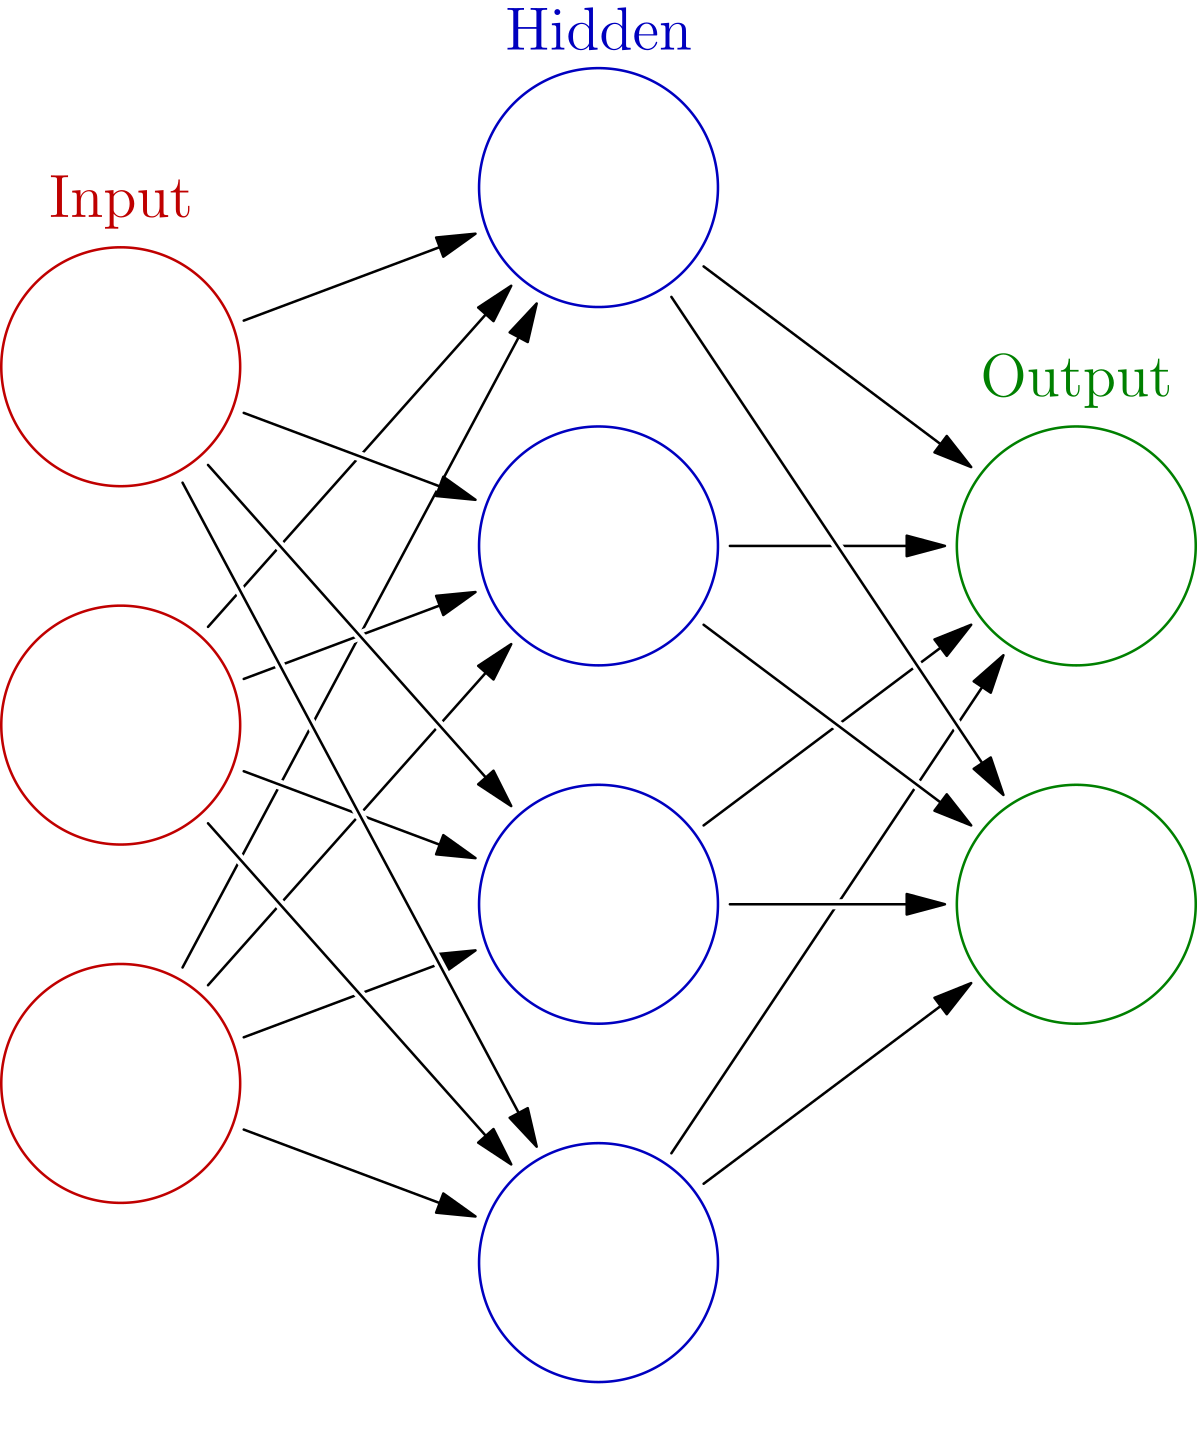

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(5, 4)  # 5 input features, 4 neurons
        self.layer2 = nn.Linear(4, 2)  # Output layer

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.layer2(x)
        return x

model = SimpleNN()
print(model)

SimpleNN(
  (layer1): Linear(in_features=5, out_features=4, bias=True)
  (layer2): Linear(in_features=4, out_features=2, bias=True)
)


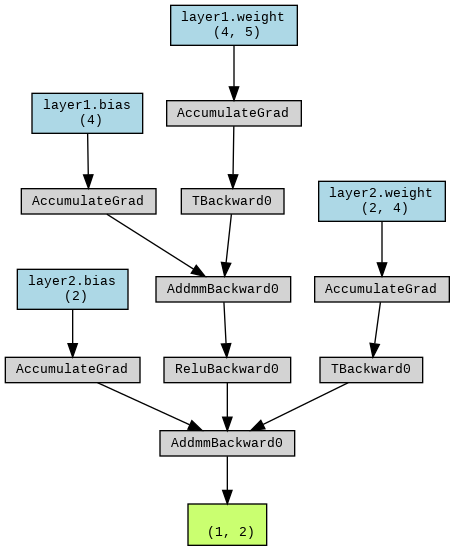

In [ ]:
# Visualize
def visualize_model(model):
    sample_input = torch.randn(1, 5)
    output = model(sample_input)
    make_dot(output, params=dict(model.named_parameters())).render("model_architecture", format="png", cleanup=True)
    from IPython.display import Image
    return Image("model_architecture.png")

visualize_model(model)

## **Section 2: Activation Functions**

#### **Conceptual Framework**
---
Activation functions introduce non-linearity. The most common are:

- **ReLU (Rectified Linear Unit)**:
 $$
 f(x) = \max(0, x)
 $$

- **Sigmoid**:
 $$
 f(x) = \frac{1}{1 + e^{-x}}
 $$

- **Tanh (Hyperbolic Tangent)**:
  $$
  f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
  $$

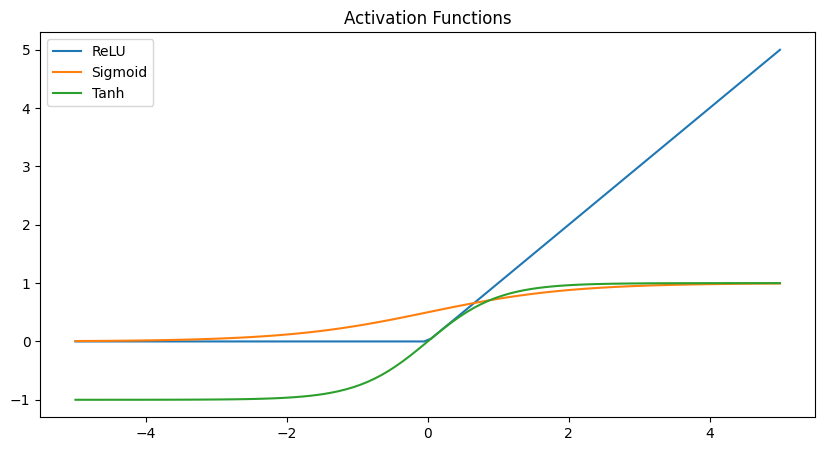

In [ ]:
def plot_activation_functions():
    x = np.linspace(-5, 5, 100)
    relu = np.maximum(0, x)
    sigmoid = 1 / (1 + np.exp(-x))
    tanh = np.tanh(x)

    plt.figure(figsize=(10, 5))
    plt.plot(x, relu, label='ReLU')
    plt.plot(x, sigmoid, label='Sigmoid')
    plt.plot(x, tanh, label='Tanh')
    plt.legend()
    plt.title("Activation Functions")
    plt.show()

plot_activation_functions()


## **Section 3: Assignment**

#### **Basic Assignment**
---
Implement a small neural network with one hidden layer.

#### **Advanced Assignment**
---
Extend the neural network to a multi-class classification problem.